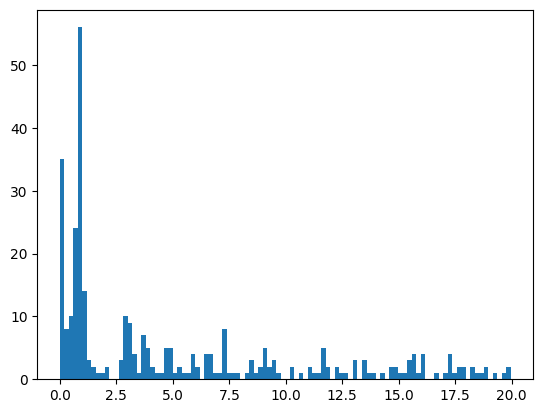

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取文件
data = np.loadtxt('log')

# 将数据转换为OpenCV的Mat类型
sloptDataP = data.reshape(-1, 1).astype(np.float32)

# 使用k均值聚类算法
K = 3  # 假设聚类数量为3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0)
ret, label, center = cv2.kmeans(sloptDataP, K, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

# 可视化
# plt.scatter(sloptDataP, np.zeros(len(sloptDataP)), c=label.flatten(), cmap='viridis')
# plt.scatter(center, np.zeros(len(center)), c='red', marker='x')
plt.hist(data, bins=100)
plt.show()


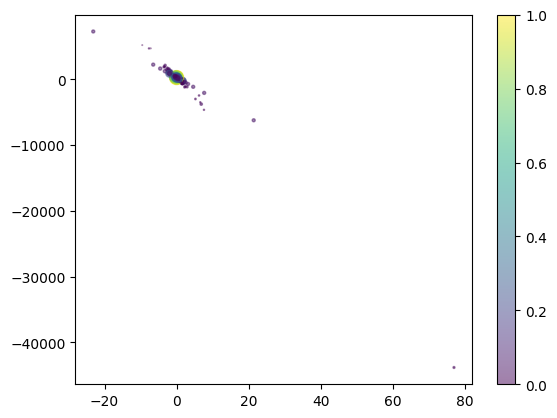

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 使用LSD检测直线
lsd = cv2.createLineSegmentDetector(0)
lines, _, _, _ = lsd.detect(gray)

# 将直线转换到(k,b)坐标系下
kL = []
bL = []
dL = []
hough_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k * x1
    d = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
    kL.append(k)
    bL.append(b)
    dL.append(d)
    hough_lines.append([k, b])

dL = np.array(dL)
dL = (dL - dL.min()) / (dL.max() - dL.min())  # 归一化到0-1之间

plt.figure()
# 创建散点图
plt.scatter(kL, bL, s=dL*100, c=dL, alpha=0.5)

# 设置颜色映射
plt.colorbar()

plt.show()

# # 使用K均值聚类算法找到坐标系下的聚点
# X = np.array(hough_lines, dtype=np.float32)
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# flags = cv2.KMEANS_RANDOM_CENTERS
# compactness, labels, centers = cv2.kmeans(X, 2, None, criteria, 10, flags)

# # 将聚点转换回直线
# for center in centers:
#     k, b = center
#     x1 = 0
#     y1 = int(b)
#     x2 = img.shape[1]
#     y2 = int(k * x2 + b)
#     cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# # 可视化结果
# plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()


In [9]:
img.shape

(480, 640, 3)